In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stock = '^STI'
data = yf.download(stock,'2010-01-01','2023-05-14')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,2897.620117,2897.620117,2886.429932,2894.550049,2894.550049,0
2010-01-05,2894.550049,2923.909912,2894.550049,2920.280029,2920.280029,0
2010-01-06,2920.280029,2937.979980,2919.739990,2930.489990,2930.489990,0
2010-01-07,2930.489990,2945.060059,2901.239990,2913.250000,2913.250000,0
2010-01-08,2913.250000,2932.719971,2909.409912,2922.760010,2922.760010,0


In [3]:
price = data['Close']
price

Date
2010-01-04    2894.550049
2010-01-05    2920.280029
2010-01-06    2930.489990
2010-01-07    2913.250000
2010-01-08    2922.760010
                 ...     
2023-05-08    3257.659912
2023-05-09    3242.949951
2023-05-10    3242.290039
2023-05-11    3229.550049
2023-05-12    3208.550049
Name: Close, Length: 3336, dtype: float64

<AxesSubplot: xlabel='Date'>

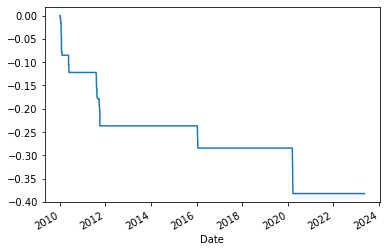

In [4]:
#Maximum Drawdown (MDD) calculation
roll_max = data['Close'].rolling(len(price)-1,min_periods=1).max()
daily_drawdown = data['Close']/roll_max - 1.0
mdd = daily_drawdown.rolling(len(price)-1,min_periods=1).min()
mdd.plot()

In [5]:
print(f"Maximum Drawdown for the given period is: {mdd[-1]*100} %")

Maximum Drawdown for the given period is: -38.22110701330285 %


In [6]:
#Cumulative returns
returns = data['Close'].resample('D').ffill().pct_change().to_numpy()
returns[0] = 0
returns

array([ 0.        ,  0.00888911,  0.00349623, ..., -0.00020349,
       -0.00392932, -0.00650245])

In [7]:
cumulative_ret =( 1+returns).cumprod()
cumulative_ret

array([1.        , 1.00888911, 1.01241642, ..., 1.12013611, 1.11573474,
       1.10847973])

In [8]:
print(f"Cumulative return of stock is {cumulative_ret[-1]*100}%")

Cumulative return of stock is 110.84797273162064%


In [9]:
# Sharpe ratio
yearly_returns = data['Close'].resample('Y').ffill().pct_change()
yearly_returns

Date
2010-12-31         NaN
2011-12-31   -0.170434
2012-12-31    0.196773
2013-12-31    0.000110
2014-12-31    0.062423
2015-12-31   -0.143358
2016-12-31   -0.000683
2017-12-31    0.181258
2018-12-31   -0.098198
2019-12-31    0.050206
2020-12-31   -0.117605
2021-12-31    0.098414
2022-12-31    0.040862
2023-12-31   -0.013155
Freq: A-DEC, Name: Close, dtype: float64

In [10]:
monthly_returns = data['Close'].resample('M').ffill().pct_change()
monthly_returns

Date
2010-01-31         NaN
2010-02-28    0.002007
2010-03-31    0.049657
2010-04-30    0.030182
2010-05-31   -0.074635
                ...   
2023-01-31    0.035170
2023-02-28   -0.030615
2023-03-31   -0.001143
2023-04-30    0.003563
2023-05-31   -0.018945
Freq: M, Name: Close, Length: 161, dtype: float64

In [11]:
avg_yearly_return = yearly_returns.mean()
print(f"Average yearly return is : {avg_yearly_return*100}%")

Average yearly return is : 0.666259349729224%


In [15]:
sharpe_ratio = (avg_yearly_return - 0.028)/(monthly_returns.std())
print(f"Sharpe ratio is : {sharpe_ratio*10}")

Sharpe ratio is : -5.2790425526289395


In [13]:
# Sortino ratio
neg_monthly_returns = monthly_returns[monthly_returns < 0]
neg_monthly_returns

Date
2010-05-31   -0.074635
2010-08-31   -0.012508
2011-01-31   -0.003235
2011-02-28   -0.053215
2011-05-31   -0.004034
                ...   
2022-10-31   -0.011862
2022-12-31   -0.011904
2023-02-28   -0.030615
2023-03-31   -0.001143
2023-05-31   -0.018945
Name: Close, Length: 72, dtype: float64

In [16]:
std_neg = neg_monthly_returns.std()
sortino = ((avg_yearly_return - 0.028)*10.0)/std_neg
print(f"Sortino Ratio: {sortino}")

Sortino Ratio: -7.162723558210217
